In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
df_prueba = pd.read_csv("Log of analysis of specific time aspects.csv",index_col=0)

reports = pd.read_excel("./Reports BPI Challenge.xlsx")
reports['BPI Challenge'] = reports['BPI Challenge'].fillna(method='pad')

reports['BPI Challenge'] = reports['BPI Challenge'].astype(int)
reports["BPI Challenge"]=reports["BPI Challenge"].apply(str)

reports["Unnamed: 1"]=reports["Unnamed: 1"].apply(str)
reports['Tupla'] = reports['Unnamed: 1'] + reports["BPI Challenge"]

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['Tupla'] = df_prueba['Report'] + df_prueba["Year"]

sLength = len(df_prueba['Tupla'])
df_prueba['Organization'] = pd.Series(np.random.randn(sLength), index=df_prueba.index)

df_prueba['prueba']= ""
df_prueba.drop(['Organization', 'prueba'], axis=1)

,case:id,case:concept:name,Operation,concept:name,time:timestamp,Question,Report,Year,Category,Type,Tupla
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-17 14:54:39.260528,P2,A1,2020,Academic,Analyze Cycle Time,A12020
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-17 15:54:39.260528,P2,A1,2020,Academic,Analyze Cycle Time,A12020
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-17 16:54:39.260528,P2,A2,2020,Student,Analyze Cycle Time,A22020
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-17 17:54:39.260528,P2,A2,2020,Student,Analyze Cycle Time,A22020
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-17 18:54:39.260528,P2,A7,2020,Academic,Analyze Cycle Time,A72020
...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-26 21:54:39.260528,P1,A19,2020,Professional,Manipulation,A192020
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-26 22:54:39.260528,P1,A19,2020,Professional,Manipulation,A192020
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-26 23:54:39.260528,P1,A19,2020,Professional,Calculate statistics,A192020
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-27 00:54:39.260528,P1,A19,2020,Professional,Analyze Cycle Time,A192020


In [3]:
# lista=[]
df_prueba['Organization'] = ""
for d in range(len(df_prueba)):
    for r in range(len(reports)):
        if(df_prueba.loc[d]['Tupla'] == reports.loc[r]['Tupla']):
#             print('si')
#             print(reports.iloc[r]['Universidad/Organización'])
#             lista.append(reports.loc[r]['Universidad/Organización'])
             df_prueba.iloc[d]['Organization'] = reports.loc[r]['Universidad/Organización']
    
df_prueba.drop(['prueba'], axis=1)

,case:id,case:concept:name,Operation,concept:name,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-17 14:54:39.260528,P2,A1,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-17 15:54:39.260528,P2,A1,2020,Academic,Analyze Cycle Time,A12020,"Technische Universität, Berlin"
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-17 16:54:39.260528,P2,A2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-17 17:54:39.260528,P2,A2,2020,Student,Analyze Cycle Time,A22020,"Faculty of Science, Utrecht University"
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-17 18:54:39.260528,P2,A7,2020,Academic,Analyze Cycle Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-26 21:54:39.260528,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-26 22:54:39.260528,P1,A19,2020,Professional,Manipulation,A192020,Sberbank
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-26 23:54:39.260528,P1,A19,2020,Professional,Calculate statistics,A192020,Sberbank
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-27 00:54:39.260528,P1,A19,2020,Professional,Analyze Cycle Time,A192020,Sberbank


In [4]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()

In [5]:
df_analisis = df_prueba.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Organization']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Organization':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,[Calculate cycle time of the whole process for...,University of Liechtenstein\nVienna University...,2017,P1
1,A1 P1 BPI 2020,"[Filter traces by activities, Calculate cycle ...","Technische Universität, Berlin",2020,P1
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time of...",University of Melbourne,2019,P2
3,A1 P2 BPI 2020,[Calculate cycle time of the whole process for...,"Technische Universität, Berlin",2020,P2
4,A1 P5 BPI 2015,[Calculate cycle time of the whole process for...,Meijer & Van der Ham Management Consultants,2015,P5
...,...,...,...,...,...
121,A8 P1 BPI 2017,"[Filter traces by activities, Calculate waitin...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
122,A8 P5 BPI 2015,[Calculate cycle time of the whole process for...,GRADIENT ECM,2015,P5
123,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
124,A9 P2 BPI 2019,"[Filter traces by year, Calculate cycle time o...",KPMG Netherlands,2019,P2


In [6]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [7]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

In [8]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [9]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
#         if(group.iloc[i]['Organization'] != 'Sberbank'):
#             org1 = 'No_Sberbank'
#         else:
#             org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
#             if(group.iloc[j]['Organization'] != 'Sberbank'):
#                 org2 = 'No_Sberbank'
#             else:
#                 org2 = 'Sberbank'
#             org = org1 + "-" + org2
            question = name[1] + name[0]
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
            df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [10]:
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P5 BPI 2015-A2 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
1,A1 P5 BPI 2015-A3 P5 BPI 2015,P52015,0.000000,0.000000,0.000000
2,A1 P5 BPI 2015-A4 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
3,A1 P5 BPI 2015-A5 P5 BPI 2015,P52015,0.363636,0.210526,0.347826
4,A1 P5 BPI 2015-A6 P5 BPI 2015,P52015,0.250000,0.117647,0.210526
...,...,...,...,...,...
981,A30 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
982,A30 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.666667,0.500000,0.666667
983,A35 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
984,A35 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.000000,0.000000,0.000000


In [11]:
estadisticas = df_metricas_preguntas.groupby(by=['question']).mean()
estadisticas

,overlap,jaccard,sorensen
question,,,
P12017,0.315713,0.127903,0.215111
P12020,0.222988,0.098453,0.160635
P22019,0.247110,0.103563,0.181426
P22020,0.287582,0.160511,0.210835
P42020,0.142525,0.053441,0.081389
P52015,0.239864,0.100497,0.171585
P52020,0.253064,0.139825,0.199665
P62020,0.209402,0.120167,0.169516


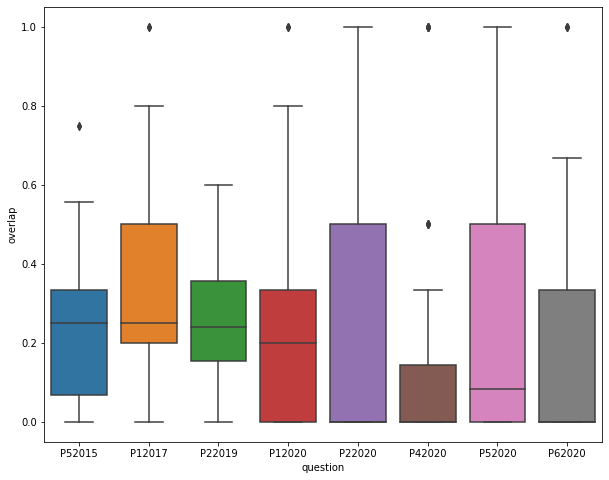

In [12]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="overlap", data=df_metricas_preguntas)

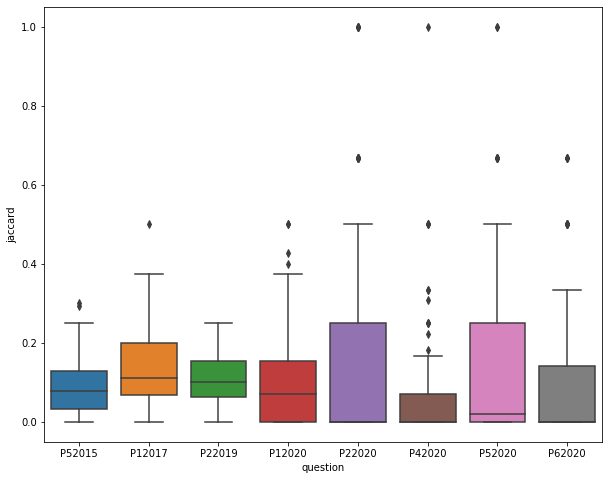

In [13]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="jaccard", data=df_metricas_preguntas)

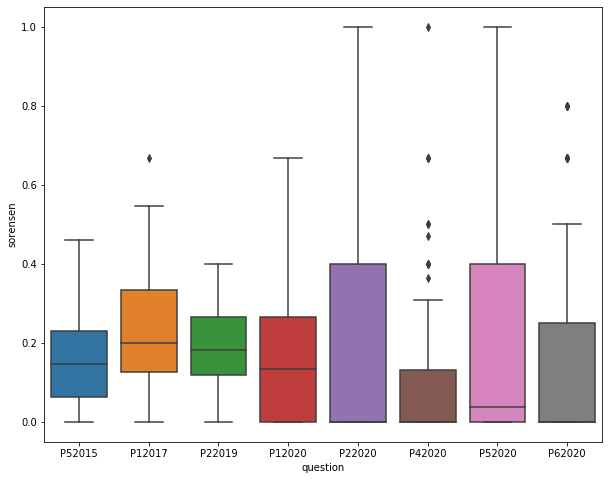

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="sorensen", data=df_metricas_preguntas)

In [30]:
df_p4 = df_prueba[df_prueba['Question']=='P4']
df_p4.groupby(['case:concept:name'])['concept:name'].count().sum()

92

In [29]:
len(df_p4['concept:name'].unique())

43

In [31]:
df_p2 = df_prueba[df_prueba['Question']=='P2']
df_p2_2020 = df_prueba[df_prueba['Year']=='2020']
df_p2_2020.groupby(['case:concept:name'])['concept:name'].count().sum()

465

In [32]:
len(df_p2_2020['concept:name'].unique())

94

In [16]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].var(ddof=0)

question
P12017    0.050370
P12020    0.091253
P22019    0.039969
P22020    0.195602
P42020    0.145853
P52015    0.031217
P52020    0.096569
P62020    0.098267
Name: overlap, dtype: float64

In [17]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].std(ddof=0)

question
P12017    0.224433
P12020    0.302081
P22019    0.199922
P22020    0.442269
P42020    0.381907
P52015    0.176684
P52020    0.310756
P62020    0.313476
Name: overlap, dtype: float64

In [18]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].var(ddof=0)

question
P12017    0.018178
P12020    0.023376
P22019    0.010497
P22020    0.105758
P42020    0.034494
P52015    0.012649
P52020    0.061416
P62020    0.041510
Name: jaccard, dtype: float64

In [19]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].std(ddof=0)

question
P12017    0.134824
P12020    0.152892
P22019    0.102453
P22020    0.325204
P42020    0.185724
P52015    0.112468
P52020    0.247823
P62020    0.203740
Name: jaccard, dtype: float64

In [20]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].var(ddof=0)

question
P12017    0.026660
P12020    0.040301
P22019    0.015537
P22020    0.124199
P42020    0.055338
P52015    0.020958
P52020    0.068057
P62020    0.053474
Name: sorensen, dtype: float64

In [21]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].std(ddof=0)

question
P12017    0.163280
P12020    0.200751
P22019    0.124647
P22020    0.352419
P42020    0.235239
P52015    0.144770
P52020    0.260877
P62020    0.231245
Name: sorensen, dtype: float64

(array([78.,  0.,  1.,  6.,  0., 18.,  2.,  0.,  1., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

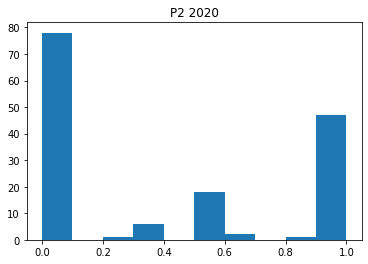

In [27]:
plt.title('P2 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P22020']['overlap'])

In [23]:
df_overlap_preguntas[df_overlap_preguntas['question']=='P22020'].head(60)

,analisis,question,overlap
483,A1 P2 BPI 2020-A10 P2 BPI 2020,P22020,0.5
484,A1 P2 BPI 2020-A11 P2 BPI 2020,P22020,1.0
485,A1 P2 BPI 2020-A12 P2 BPI 2020,P22020,0.0
486,A1 P2 BPI 2020-A13 P2 BPI 2020,P22020,1.0
487,A1 P2 BPI 2020-A16 P2 BPI 2020,P22020,0.0
488,A1 P2 BPI 2020-A18 P2 BPI 2020,P22020,0.0
489,A1 P2 BPI 2020-A2 P2 BPI 2020,P22020,1.0
490,A1 P2 BPI 2020-A24 P2 BPI 2020,P22020,0.0
491,A1 P2 BPI 2020-A25 P2 BPI 2020,P22020,1.0
492,A1 P2 BPI 2020-A26 P2 BPI 2020,P22020,1.0


In [34]:
df_p2 = df_prueba[df_prueba['Question']=='P2']
df_p2_2020 = df_p2[df_p2['Year']=='2020']
df_p2_2020.groupby('case:concept:name')['concept:name'].count()

case:concept:name
A1 P2 BPI 2020      2
A10 P2 BPI 2020     2
A11 P2 BPI 2020     2
A12 P2 BPI 2020     3
A13 P2 BPI 2020     3
A16 P2 BPI 2020     7
A18 P2 BPI 2020     1
A2 P2 BPI 2020      2
A24 P2 BPI 2020     3
A25 P2 BPI 2020     3
A26 P2 BPI 2020     2
A27 P2 BPI 2020     2
A28 P2 BPI 2020     3
A30 P2 BPI 2020    11
A31 P2 BPI 2020     1
A35 P2 BPI 2020    12
A37 P2 BPI 2020     2
A7 P2 BPI 2020      4
Name: concept:name, dtype: int64

(array([60.,  0.,  7., 23.,  2., 11.,  5.,  0.,  1., 27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

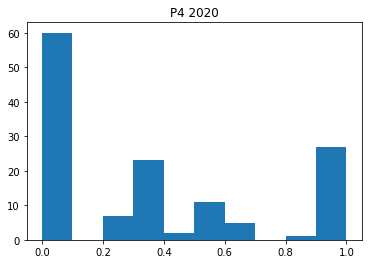

In [10]:
plt.title('P4 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P42020']['overlap'])

In [36]:
df_overlap_preguntas[df_overlap_preguntas['question']=='P42020'].head(60)

,analisis,question,overlap
636,A10 P4 BPI 2020-A11 P4 BPI 2020,P42020,0.000000
637,A10 P4 BPI 2020-A12 P4 BPI 2020,P42020,1.000000
638,A10 P4 BPI 2020-A13 P4 BPI 2020,P42020,1.000000
639,A10 P4 BPI 2020-A16 P4 BPI 2020,P42020,1.000000
640,A10 P4 BPI 2020-A18 P4 BPI 2020,P42020,1.000000
641,A10 P4 BPI 2020-A19 P4 BPI 2020,P42020,0.000000
642,A10 P4 BPI 2020-A2 P4 BPI 2020,P42020,0.500000
643,A10 P4 BPI 2020-A24 P4 BPI 2020,P42020,1.000000
644,A10 P4 BPI 2020-A25 P4 BPI 2020,P42020,0.500000
645,A10 P4 BPI 2020-A26 P4 BPI 2020,P42020,0.000000


In [35]:
df_p4 = df_prueba[df_prueba['Question']=='P4']
df_p4_2020 = df_p4[df_p4['Year']=='2020']
df_p4_2020.groupby('case:concept:name')['concept:name'].count()

case:concept:name
A10 P4 BPI 2020     2
A11 P4 BPI 2020     8
A12 P4 BPI 2020     1
A13 P4 BPI 2020     4
A16 P4 BPI 2020    10
A18 P4 BPI 2020     2
A19 P4 BPI 2020    18
A2 P4 BPI 2020      3
A24 P4 BPI 2020    10
A25 P4 BPI 2020     3
A26 P4 BPI 2020     2
A27 P4 BPI 2020     3
A28 P4 BPI 2020    10
A31 P4 BPI 2020     2
A35 P4 BPI 2020     8
A37 P4 BPI 2020     1
A7 P4 BPI 2020      5
Name: concept:name, dtype: int64

In [37]:
df_p4[df_p4['Tupla']=='A102020']

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla,Organization,prueba
47,A10 P4 BPI 2020,Represent process map,Represent process map with cycle time,2021-10-19 12:47:13.996946,A10,P4,2020,Academic,Representation,A102020,"Internal Audit Department, Rostov-on-Don",
48,A10 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2021-10-19 12:47:13.996946,A10,P4,2020,Academic,Analyze Cycle Time,A102020,"Internal Audit Department, Rostov-on-Don",


In [38]:
df_p4[df_p4['Tupla']=='A122020']

,case:concept:name,concept:name,Specific operation,time:timestamp,Report,Question,Year,Category,Type,Tupla,Organization,prueba
49,A12 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2021-10-19 12:47:13.996946,A12,P4,2020,Professional,Analyze Cycle Time,A122020,Sberbank,


(array([12.,  0.,  2., 15.,  0., 22., 37.,  0.,  1., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

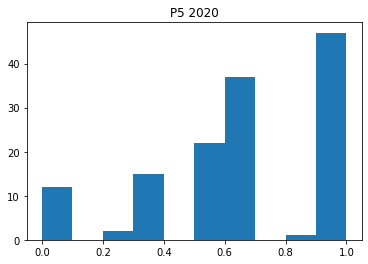

In [11]:
plt.title('P5 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P52020']['overlap'])

(array([ 8.,  0.,  0., 11.,  1., 23., 12.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

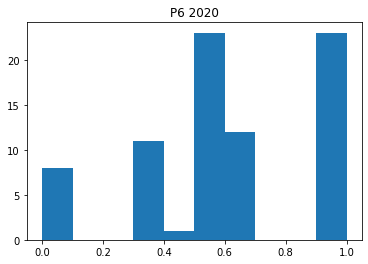

In [12]:
plt.title('P6 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P62020']['overlap'])